## Final Project Pt 3

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pl
%matplotlib inline

## Data Load

Aid project disbursements in Sierra Leone by Area

In [6]:
# read in the data
df = pd.read_csv("projects.csv")



# look at the top rows
print("Aid project disbursements in Sierra Leone by sector, 1992-2014")
df.round()


Aid project disbursements in Sierra Leone by sector, 1992-2014


,Year,Agriculture,Government,Education,Health
0,1992,0.0,0.0,51750.0,0.0
1,1993,0.0,0.0,51750.0,0.0
2,1994,0.0,0.0,51750.0,0.0
3,1995,0.0,0.0,51750.0,0.0
4,1996,0.0,0.0,51750.0,0.0
5,1997,0.0,0.0,51750.0,0.0
6,1998,0.0,112370.0,51750.0,0.0
7,1999,0.0,112370.0,51750.0,0.0
8,2000,0.0,112370.0,51750.0,2321161.0
9,2001,0.0,380180.0,51750.0,2321161.0


In [26]:
df.describe()

,Year,Agriculture,Government,Education,Health
count,23.00000,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01
mean,2003.00000,1.104886e+07,3.237094e+07,9.458541e+06,3.163766e+07
std,6.78233,1.285173e+07,4.050640e+07,1.130368e+07,3.798840e+07
min,1992.00000,0.000000e+00,0.000000e+00,5.175007e+04,0.000000e+00
25%,1997.50000,0.000000e+00,5.618525e+04,5.175007e+04,0.000000e+00
50%,2003.00000,5.835361e+06,4.418195e+06,8.147321e+06,6.721179e+06
75%,2008.50000,1.988832e+07,6.078336e+07,1.730730e+07,6.089677e+07
max,2014.00000,3.573555e+07,1.071723e+08,4.279596e+07,1.166506e+08


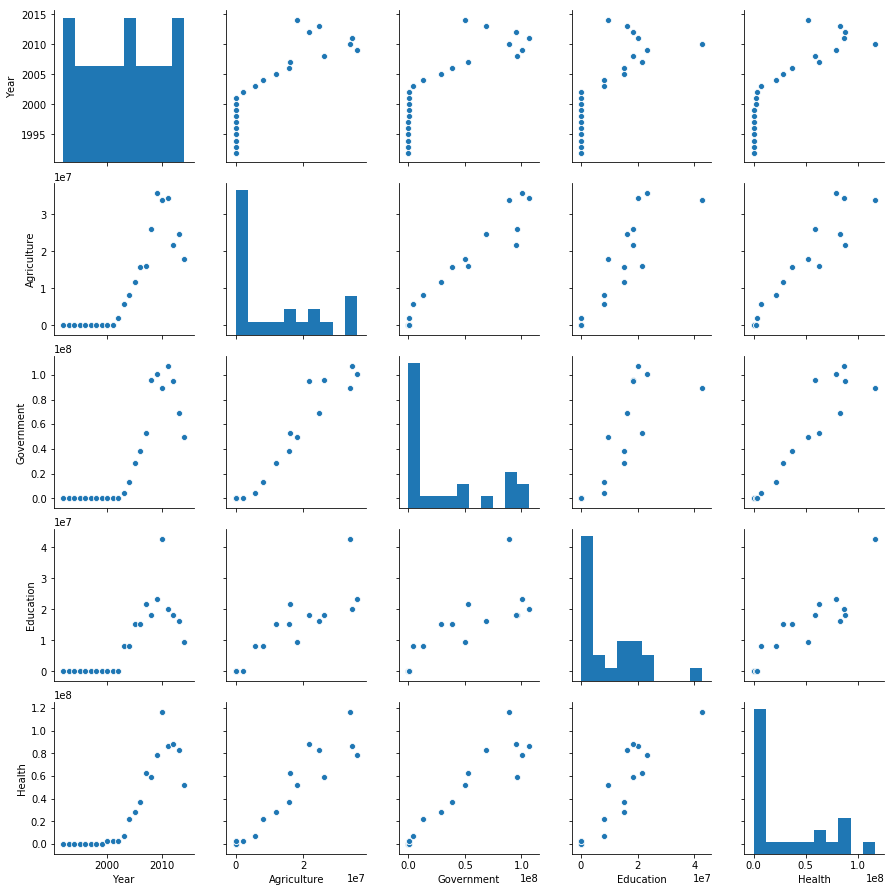

In [12]:
sns.pairplot(df)

*Conclusions*
* Funding is not normally distributed 
* Funding across sectors looks to be roughly linearly rated

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
Year           23 non-null int64
Agriculture    23 non-null float64
Government     23 non-null float64
Education      23 non-null float64
Health         23 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1000.0 bytes


Test


Text(0,0.5,'AID Funding (in USD millions)')

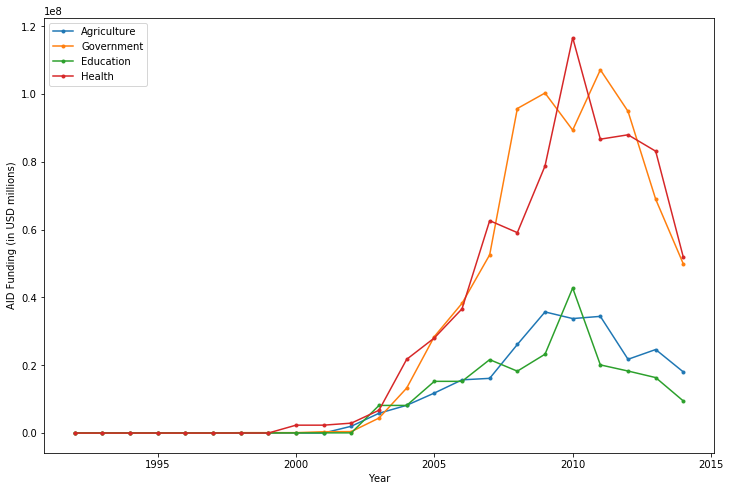

In [11]:
print("Test")
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df.set_index('Year').plot(ax=ax, marker=".", linestyle="-")
plt.xlabel("Year")
plt.ylabel("AID Funding (in USD millions)")

*Conclusions*
* Goverment and Health attract the lion share of AID funding
* Education and Agriculture attract less, but a similar amount to each other
* Funding did not kick in until 2003/2004, rose until around 2010, then declined quickly after that

In [13]:
hdi_df_o = pd.read_csv('hdi.csv')
# Trim the years after 2014 off the data
hdi_df = hdi_df_o[hdi_df_o['Year'] <= 2014]
hdi_df.tail()

,Year,Education Index,Agri Employment,Income Index,Life Expectancy Index
18,2010,0.349,63.7,0.377,0.434
19,2011,0.357,63.2,0.379,0.447
20,2012,0.364,61.2,0.404,0.458
21,2013,0.372,58.2,0.423,0.468
22,2014,0.374,57.7,0.424,0.476


In [114]:
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
Year                     23 non-null int64
Education Index          23 non-null float64
Agri Employment          23 non-null float64
Income Index             23 non-null float64
Life Expectancy Index    23 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


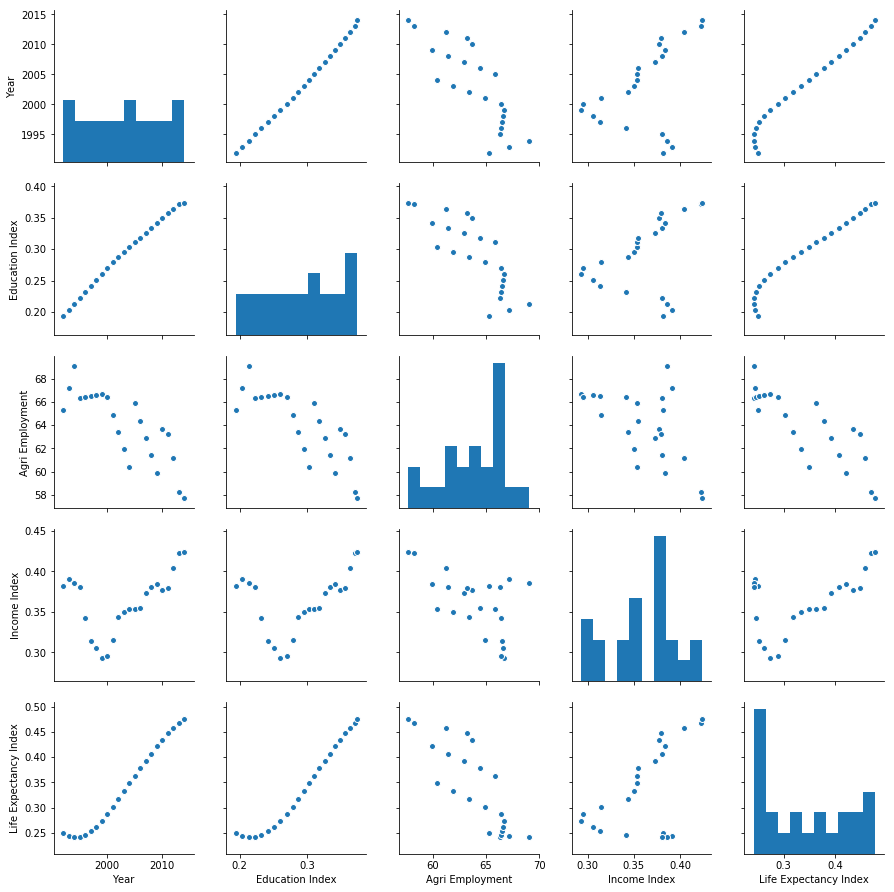

In [17]:
sns.pairplot(hdi_df)

*Conclusions*
* None of the indicators are normally distrubted (you would not expect this on a time series)
* There aren't any particularly obvious relationships between indicators, except between Education and Life Expectancy which looked to increase at a similar rate

Text(0,0.5,'HDI Index Score')

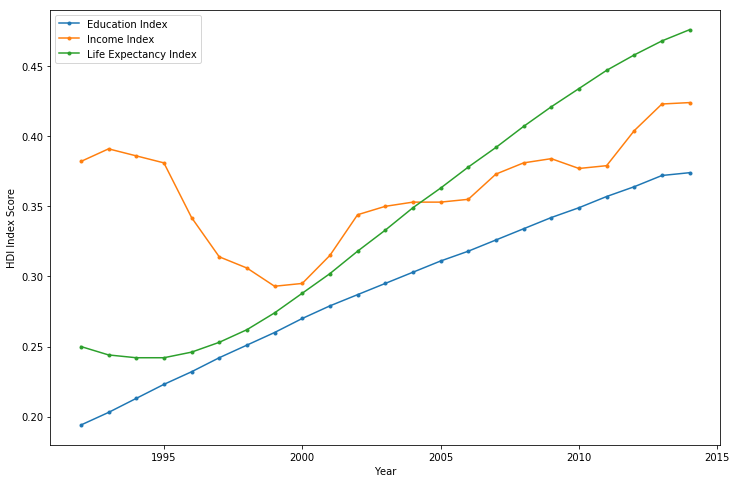

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
hdi_df.drop(columns=['Agri Employment']).set_index('Year').plot(ax=ax, marker=".", linestyle="-")
plt.xlabel("Year")
plt.ylabel("HDI Index Score")

*Conclusions*
* Education and Life Expectancy Indexes rose steadily over time
* Income Index is more erratic, decling in the late 90s, but rising after that
* Agricultural Employment cannot be shown on the same graph as it's a different type of statistic

Text(0,0.5,'% of Workforce Employed in Agriculture')

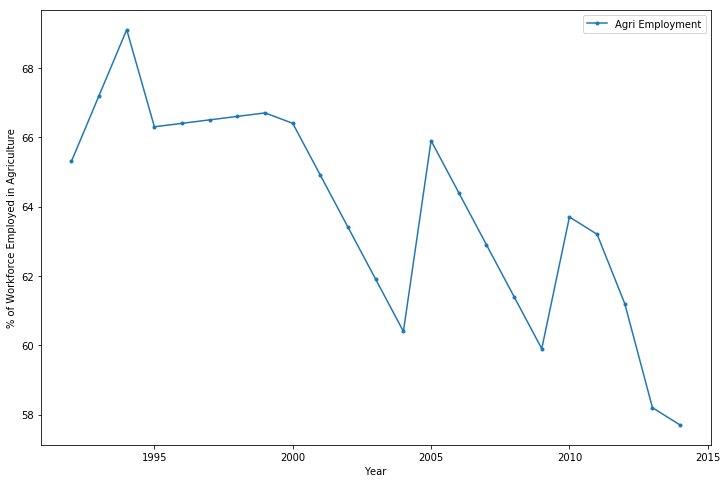

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
hdi_df[['Year','Agri Employment']].set_index('Year').plot(ax=ax, marker=".", linestyle="-")
plt.xlabel("Year")
plt.ylabel("% of Workforce Employed in Agriculture")

*Conclusions*
* There's a general downward trend in Agricultural Employment from 1992 to 2014
* There are unexpected spikes in 2005 and 2010, Suggesting there may be some data issues to look into (Agricultural Employment was one of the measures that required manual value-filling due to missing data)